# Bank Personal Loan Sanctioned

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Change the current working directory to the specified path.
#path may always be specified as a string.
#On some platforms, path may also be specified as an open file descriptor.
#If this functionality is unavailable, using it raises an exception
import pandas as pd
os.chdir('/content/gdrive/My Drive/placement/IIBM/stats')
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

**Exploratory Data Analysis**

In [ ]:
df.head()
#here zipcode and id is of no use remove that

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df = df.drop(['ID','ZIP Code'],axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal Loan       4987 non-null   int64  
 8   Securities Account  4987 non-null   int64  
 9   CD Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

#Most people who buy a home do so with a mortgage. A mortgage is a necessity if you can’t pay the full cost of a home out of pocket.
#A mortgage is a loan that the borrower uses to purchase or maintain a home or 
# other form of real estate and agrees to pay back over time, typically in a series of regular payments.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,45.347704,20.114498,73.824544,2.396631,1.940606,1.879286,56.646080,0.096250,0.104672,0.060557,0.596150,0.294566
std,11.460838,11.464902,46.062728,1.147510,1.748831,0.839667,101.805341,0.294964,0.306161,0.238541,0.490717,0.455893
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_no = df[df['Personal Loan']==0]
#personal loan no

In [ ]:
df_yes = df[df['Personal Loan']==1]
#personal loan yes

In [ ]:
for i,j in zip(range(len(df.columns)),df.columns):
  print(i,j)

0 Age
1 Experience
2 Income
3 Family
4 CCAvg
5 Education
6 Mortgage
7 Personal Loan
8 Securities Account
9 CD Account
10 Online
11 CreditCard


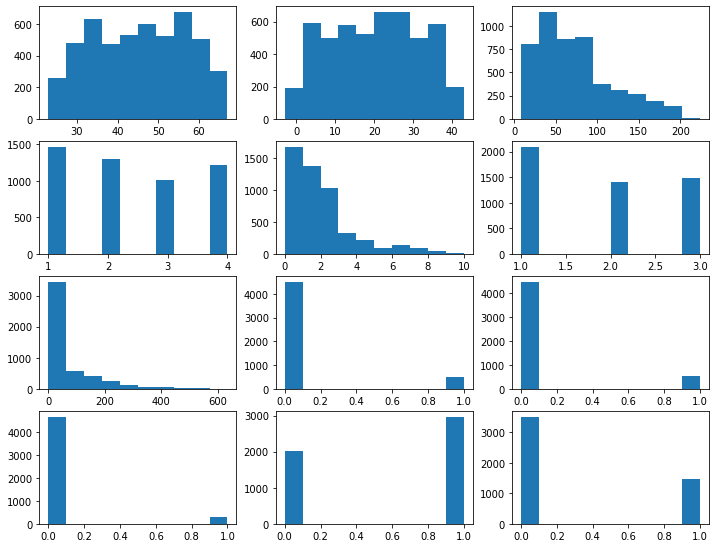

In [ ]:
# distribution of variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df.columns)),df.columns):
  plt.subplot(5,3,i+1)
  plt.hist(df[j])

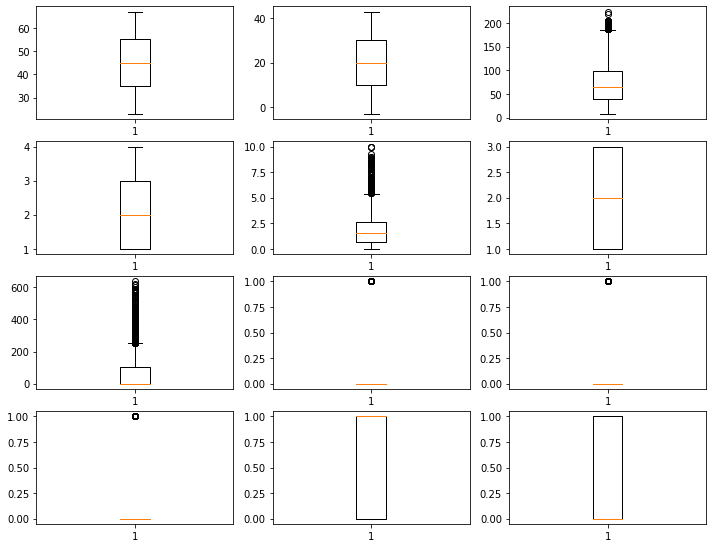

In [ ]:
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df.columns)),df.columns):
  plt.subplot(5,3,i+1)
  plt.boxplot(df[j])

#Machine learning Algorithm application on bank loan data set

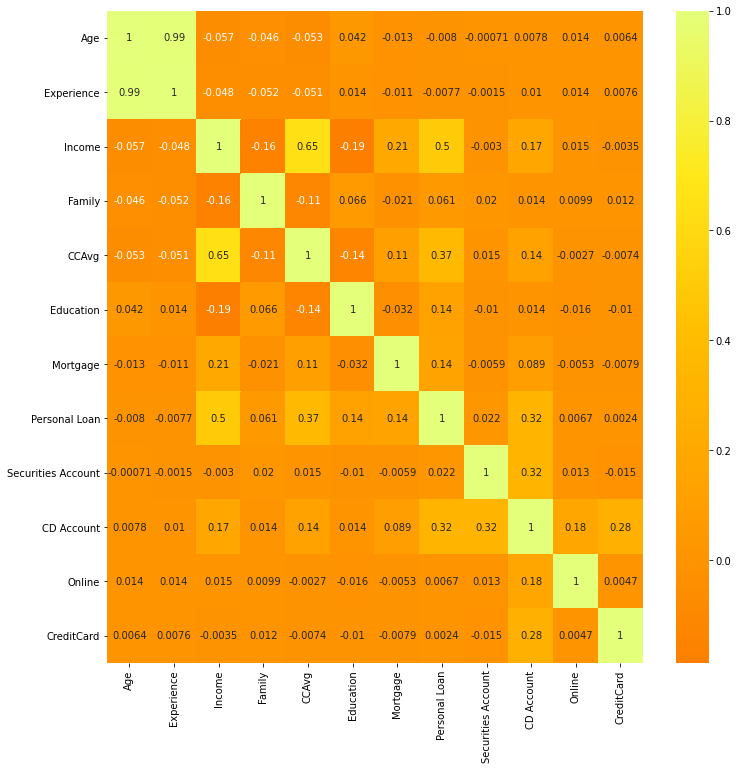

In [ ]:
cm = df.corr()
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm,cmap='Wistia_r',annot=True)

In [ ]:
import statsmodels.api as sm
y = df['Personal Loan']
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
mdl.score(x,y)

0.9514738319631041

In [ ]:
mdl.coef_

array([[-5.15771581e-01,  5.22397866e-01,  4.93296059e-02,
         7.67991680e-01,  1.58680438e-01,  1.69969549e+00,
         1.01608969e-03,  1.99606533e-01,  2.44400355e+00,
        -4.28107028e-01, -4.63861527e-01]])

In [ ]:
mdl.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
import statsmodels.api as sm
y = df['Personal Loan']
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]
x = sm.add_constant(x)

mdl = sm.Logit(y,x).fit()
mdl.summary()

#here Age, experience and mortgage is not important parameter so we can remove that

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.5936
Time:                        14:00:48   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

In [ ]:
import statsmodels.api as sm
y = df['Personal Loan']
x = df[['Income', 'Family', 'CCAvg', 'Education',
       'Securities Account', 'CD Account',
       'Online', 'CreditCard']]
x = sm.add_constant(x)

mdl = sm.Logit(y,x).fit()
mdl.summary()
#here Age, experience and mortgage is not important parameter so we can remove that

Optimization terminated successfully.
         Current function value: 0.129148
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4978
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.5923
Time:                        14:00:48   Log-Likelihood:                -644.06
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2156      0.562    -23.503      0.000     -14.318     -12.114
Income                 0.0547      0.003     21.122      0.000       0.050       0.060
Family                 0.6895      0.074      9.290      0.000       0.544       0.835
CCAvg                  0.1134      0.039      2.888      0.004       0.036       0.190
Education              1.7040      0.112     15.165      0.000       1.484       1.924
Securities Account    -0.9349      0.285     -3.284      0.001      -1.493      -0.377
CD Account             3.8492      0.323     11.903      0.000       3.215       4.483
Online                -0.6648      0.157     -4.241      0.000      -0.972      -0.358
CreditCard            -1.1224      0.205     -5.475      0.000      -1.524      -0.721
======================================================================================
"""

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
x = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_mdl = RandomForestClassifier(n_estimators=1000,oob_score=True)
rf_mdl.fit(X=df[x],y=df['Personal Loan'])
#Random Forest does not require split sampling method to assess accuracy of the model. 
#It performs internal validation as 2-3rd of available training data is used to grow 
#each tree and the remaining one-third portion of training data always used to calculate out-of bag error to assess model performance.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_mdl.oob_score_

0.9883697613795869

In [ ]:
for feature,imp in zip(x,rf_mdl.feature_importances_):
  print(feature,imp)
  #here Income=0.34, CCAvg=0.15, Education= 0.20, Family=0.11

Age 0.035455167904803145
Experience 0.03517607542254986
Income 0.34905648308234144
Family 0.11469096203682876
CCAvg 0.1628341968746448
Education 0.19672987662032548
Mortgage 0.03342782825978955
Securities Account 0.004115854957421014
CD Account 0.05360231977386552
Online 0.006848312609642862
CreditCard 0.008062922457787471


In [ ]:
imp_feat = ['Income', 'CCAvg', 'Education','Family']

In [ ]:
from sklearn import *

In [ ]:
tree_mdl = tree.DecisionTreeClassifier()
tree_mdl.fit(df[imp_feat],df['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_mdl.score(df[imp_feat],df['Personal Loan'])

0.9997994786444756

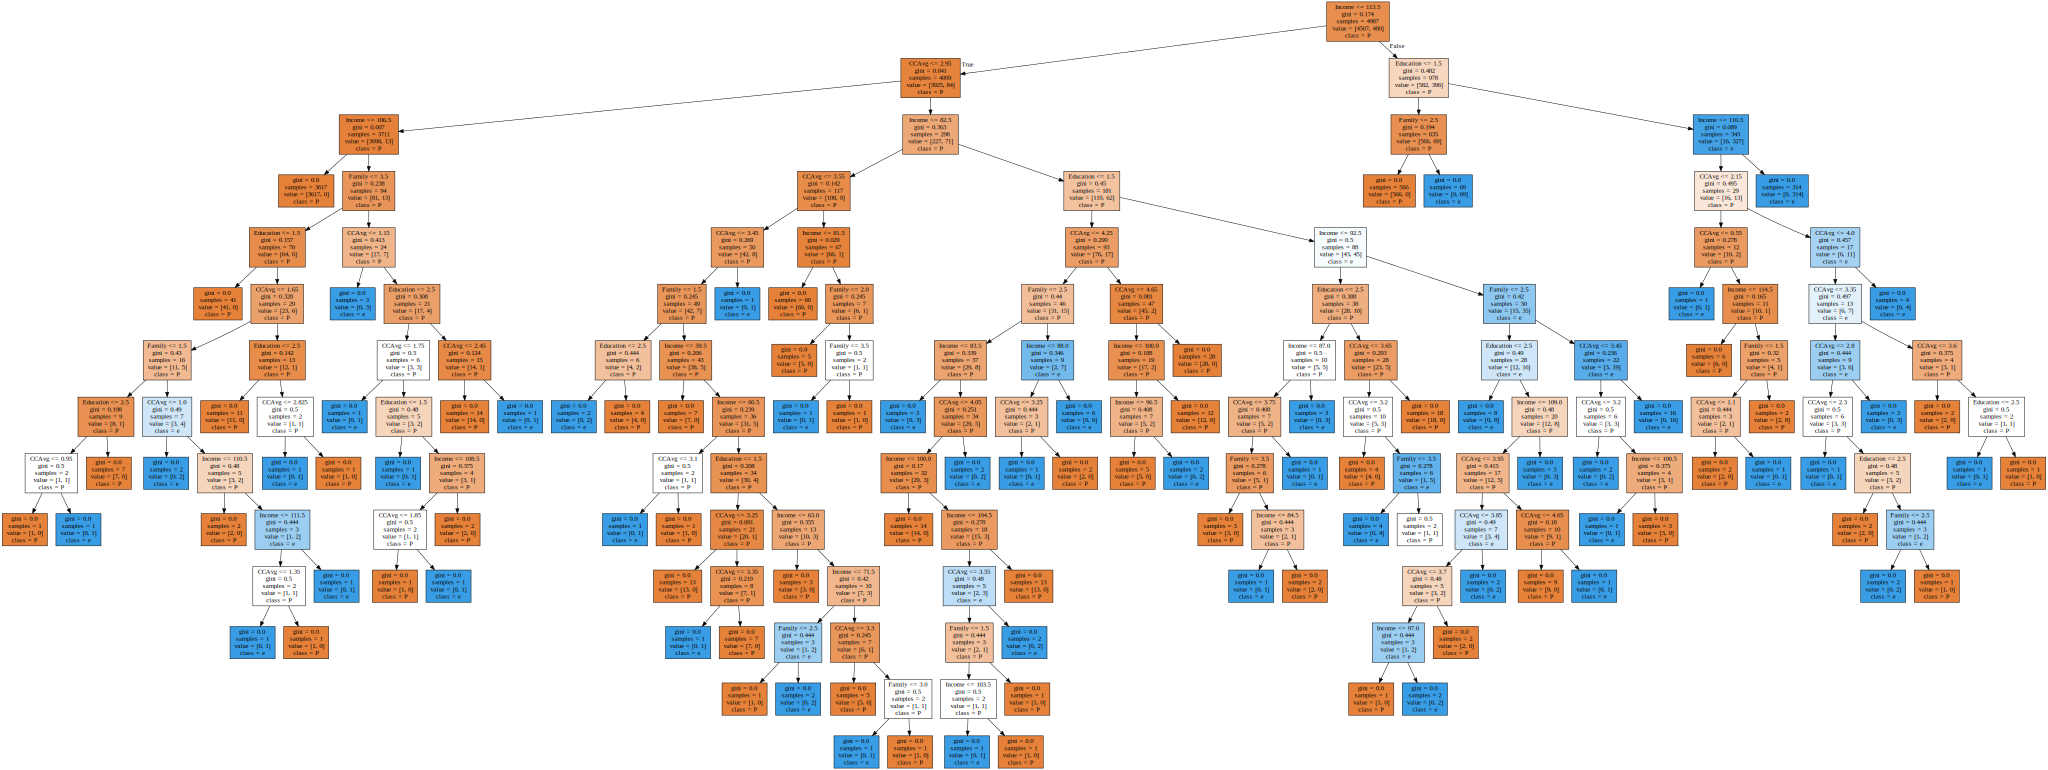

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_mdl, out_file=None, 
                                feature_names= ['Income', 'CCAvg', 'Education','Family'],  
                                class_names='Personal Loan',
                                filled=True)
# here feature name we put that will shown on tree and also same with class names
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# here there are total 889 samples in which 549 are not survived i.e zero and 340 are survived i.e. 1
#549 represent not survived and 340 represent survived
# after that it split into female==True==0 and male==false==1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
X=df[x]
y=df['Personal Loan']

In [ ]:
# spliting the dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
knn=neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn.score(x_train,y_train)

0.9498567335243553

In [ ]:
y_pred =knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9191716766867067

In [ ]:
from sklearn.svm import SVC
svm_mdl = svm.SVC(gamma=0.001,C=100) 
svm_mdl.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_mdl.score(x_train,y_train)

0.9893982808022923

In [ ]:
ypredict=svm_mdl.predict(x_test)

In [ ]:
accuracy_score(y_test,ypredict)

0.9452237808951236

In [ ]:
confusion_matrix(y_test,ypredict)

array([[1342,   30],
       [  52,   73]])